In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6595,6596,15734948,Igwebuike,601,Spain,Male,24,7,0.00,2,0,0,144660.42,0
9247,9248,15650244,Bezrukov,786,Spain,Male,29,7,80895.44,2,1,0,64945.57,0
4905,4906,15627999,Kung,590,Spain,Male,30,3,0.00,2,1,0,83090.35,0
9035,9036,15807555,Chung,535,France,Male,45,2,0.00,2,1,0,125658.28,0
7146,7147,15646594,Ali,749,France,Male,41,5,57568.94,1,1,1,61128.29,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.drop("CustomerId", axis='columns', inplace=True)


In [6]:
df.drop("Surname", axis='columns', inplace=True)


In [7]:
df.drop("RowNumber", axis='columns', inplace=True)


In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=="object":
            print(f'{column} : {df[column].unique()}')

            
print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [11]:
df.shape

(10000, 11)

In [12]:
df["Gender"].replace({'Female':1,'Male':0},inplace=True)

In [13]:
df["Gender"].unique()

array([1, 0], dtype=int64)

In [14]:
df1=pd.get_dummies(data=df,columns=['Geography'])
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [15]:
cols_to_scale = ["CreditScore","Balance","EstimatedSalary","Tenure","Age","NumOfProducts"]

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df1[cols_to_scale]=scalar.fit_transform(df1[cols_to_scale])

In [16]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1255,0.548,0,0.378378,0.3,0.000000,0.333333,1,1,0.314097,0,0,0,1
7523,0.928,1,0.729730,0.2,0.000000,0.333333,0,1,0.654270,0,0,0,1
4461,0.798,1,0.135135,0.3,0.000000,0.000000,1,0,0.016987,0,0,0,1
4889,0.682,1,0.310811,0.8,0.435053,0.666667,1,1,0.744257,1,0,1,0
4423,0.870,1,0.297297,0.3,0.000000,0.333333,1,1,0.484152,0,1,0,0


In [17]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [18]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [19]:
df1.shape

(10000, 13)

In [20]:
X = df1.drop('Exited',axis='columns')
Y = df1['Exited']

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=5)

In [22]:
xtrain.shape

(8000, 12)

In [23]:
xtest.shape

(2000, 12)

In [24]:
ytrain.shape

(8000,)

In [25]:
ytest.shape

(2000,)

In [26]:
len(xtrain.columns)

12

In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12,input_shape =(12,),activation='relu'),
    keras.layers.Dense(10,input_shape =(12,),activation='relu'),
    keras.layers.Dense(7,input_shape =(12,),activation='relu'),
    keras.layers.Dense(5,input_shape =(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),    
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=30)

Epoch 1/30
250/250 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7934
Epoch 2/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.7960
Epoch 3/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7971
Epoch 4/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.8010
Epoch 5/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8067
Epoch 6/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8124
Epoch 7/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8159
Epoch 8/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8174
Epoch 9/30
250/250 [==============================] - 0s 907us/step - loss: 0.4187 - accuracy: 0.8215
Epoch 10/30
250/250 [==============================] - 0s 928us/step - loss: 0.4120 - accuracy: 0.

In [34]:
model.evaluate(xtest,ytest)

63/63 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8535


[0.357605516910553, 0.8535000085830688]

In [35]:
yp = model.predict(xtest)
yp[:5]

array([[0.02169988],
       [0.0280202 ],
       [0.06728113],
       [0.10788736],
       [0.03235963]], dtype=float32)

In [36]:
ytest[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [37]:
ypred=[]
for element in yp:
    if element>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.8535

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.78      0.38      0.51       405

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.85      0.83      2000



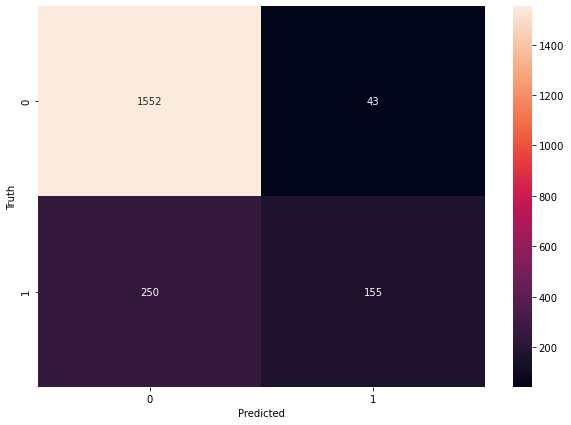

In [40]:
import seaborn as sn
cn = tf.math.confusion_matrix(labels=ytest,predictions=ypred)

plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [46]:
y = 0
for i in df["Exited"]:
    if i == 0:
        y+=1

In [47]:
y

7963

In [45]:
250+155

405